In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
key = '1e3d66c2ff76d4310424a246f0e8c35c'
currencies = ['BTC', 'ETH', 'LTC', 'BCH', 'XRP', 'ZRX']

In [3]:
raw = dict()
data = dict()
for target in currencies:
    symbols = [symbol for symbol in currencies if symbol != target]
    
    url = f'http://api.coinlayer.com/api/live?access_key={key}&symbols={",".join(symbols)}&target={target}'
    response_data = requests.get(url).json()
    
    raw[target] = response_data
    data[target] = response_data['rates']

In [4]:
paths = []
for currency in currencies:
    queue = []
    queue.append(([currency], 1))
    while queue:
        path, rate = queue.pop(0)
        current = path[-1]
        for next_ in data.get(current, []):

            new_rate = rate * data[current][next_]

            new_path = list(path)
            new_path.append(next_) 

            if next_ not in path:
                queue.append((new_path, new_rate))
            elif next_ == currency:
                paths.append((new_path, new_rate))


In [5]:
paths

[(['BTC', 'BCH', 'BTC'], 1.000030145265),
 (['BTC', 'ETH', 'BTC'], 0.9999938449590001),
 (['BTC', 'LTC', 'BTC'], 1.000053104391),
 (['BTC', 'XRP', 'BTC'], 0.9999999946232799),
 (['BTC', 'ZRX', 'BTC'], 1.0000000045152435),
 (['BTC', 'BCH', 'ETH', 'BTC'], 1.000030216783896),
 (['BTC', 'BCH', 'LTC', 'BTC'], 1.0000311666740538),
 (['BTC', 'BCH', 'XRP', 'BTC'], 1.000145269660464),
 (['BTC', 'BCH', 'ZRX', 'BTC'], 1.0001874482176762),
 (['BTC', 'ETH', 'BCH', 'BTC'], 0.9999951245942924),
 (['BTC', 'ETH', 'LTC', 'BTC'], 0.9999922158768013),
 (['BTC', 'ETH', 'XRP', 'BTC'], 0.9990973174396361),
 (['BTC', 'ETH', 'ZRX', 'BTC'], 0.9992743368035757),
 (['BTC', 'LTC', 'BCH', 'BTC'], 1.0000530709789957),
 (['BTC', 'LTC', 'ETH', 'BTC'], 1.0000531431573476),
 (['BTC', 'LTC', 'XRP', 'BTC'], 0.9999938518328577),
 (['BTC', 'LTC', 'ZRX', 'BTC'], 0.999992262549025),
 (['BTC', 'XRP', 'BCH', 'BTC'], 0.999999995352083),
 (['BTC', 'XRP', 'ETH', 'BTC'], 0.9999999955796988),
 (['BTC', 'XRP', 'LTC', 'BTC'], 0.999999

In [6]:
rates = np.array([path[1] for path in paths])

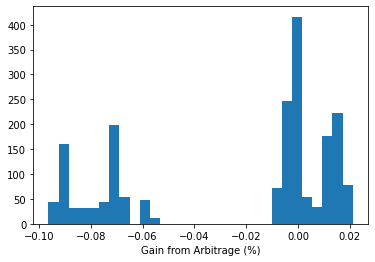

In [7]:
plt.hist(100 * (rates - 1), bins=30)
plt.xlabel('Gain from Arbitrage (%)')
plt.show()

In [171]:
max_rate = -np.infty
best_path = None
for path, rate in paths:
    if rate > max_rate:
        best_path = path
        max_rate = rate
        
print(f'Best path: {best_path}\nGains from Arbitrage: {round(100 * (max_rate - 1), 5)}%')

Best path: ['BTC', 'LTC', 'XRP', 'BCH', 'ETH', 'ZRX', 'BTC']
Gains from Arbitrage: 0.05282%
